In [1]:
import torch
from torchvision import datasets,transforms
import os
import numpy as np
import time
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import copy

In [2]:
def funcL(x):
    y = np.sin(8*np.pi*x)
    return y

def funcH(x):
    y = (x-np.sqrt(2))*np.power(funcL(x),2)
    return y

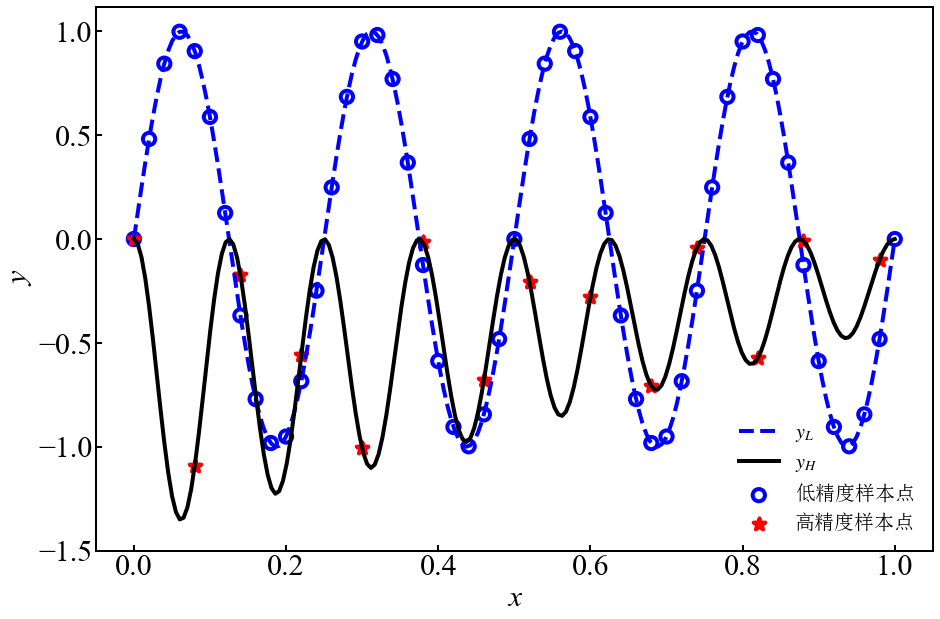

In [6]:
a = np.linspace(0,1,200)
b = funcL(a)
c = funcH(a)

xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
legend = plt.legend([r"$y_L$",r"$y_H$","低精度样本点","高精度样本点"],frameon=False)
# legend.get_frame().set_linewidth(2)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1],font="Times New Roman", fontsize = 30)
plt.yticks([-1.5,-1,-0.5,0,0.5,1],font="Times New Roman", fontsize = 30)
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-2-1.png",dpi=600,bbox_inches = 'tight')
plt.show()

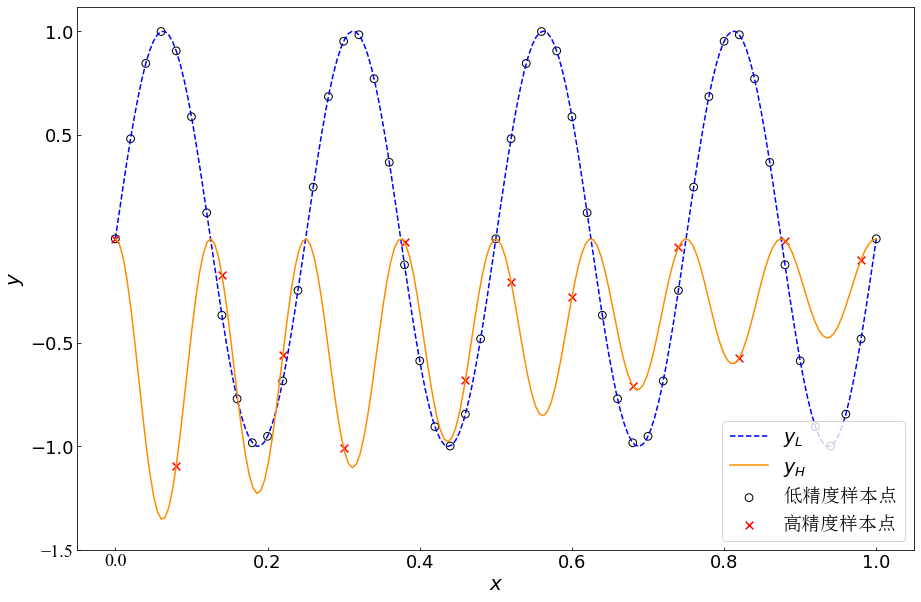

In [3]:
# a = np.linspace(0,1,200)
# b = funcL(a)
# c = funcH(a)

# xL = np.linspace(0,1,51).reshape((-1,1))
# yL = funcL(xL)
# xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
# yH = funcH(xH)

# fig = plt.figure(figsize=(15,10))
# font1={'family':'Times New Roman',
#     'weight':'bold',
#       'size':20
# }
# plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
# plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
# plt.plot(a,b,color='b',linestyle='--')
# plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='k',s=60)
# plt.plot(a,c,color='darkorange')
# plt.scatter(xH,yH,marker='x',color='r',s=60)
# plt.legend([r"$y_L$",r"$y_H$","低精度样本点","高精度样本点"],prop={'family':'SimSun','weight':'bold','size':19})
# plt.xticks([0,0.2,0.4,0.6,0.8,1],fontproperties = 'Times New Roman', size = 18)
# plt.yticks([-1.5,-1,-0.5,0.5,1],fontproperties = 'Times New Roman', size = 18)
# plt.xlabel(r"$x$",fontdict=font1)
# plt.ylabel(r"$y$",fontdict=font1)
# plt.savefig("E:/graduation_project/中期答辩/中期答辩进展报告/图/5.png",dpi=600,bbox_inches = 'tight')
# plt.show()

# 方法一

In [7]:
xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)
high_idx = [0,4,7,11,15,19,23,26,30,34,37,41,44,49]

x_train = xL
y_train_low = yL
y_train_high = np.zeros_like(y_train_low)
y_train_high[:,:] = y_train_low
y_train_high[high_idx] = yH

beta_train = np.ones_like(x_train)*1e-5
beta_train[high_idx] = 2

print(yL)
print(yH)
print(x_train)
print(y_train_low)
print(y_train_high)
print(beta_train)

[[ 0.00000000e+00]
 [ 4.81753674e-01]
 [ 8.44327926e-01]
 [ 9.98026728e-01]
 [ 9.04827052e-01]
 [ 5.87785252e-01]
 [ 1.25333234e-01]
 [-3.68124553e-01]
 [-7.70513243e-01]
 [-9.82287251e-01]
 [-9.51056516e-01]
 [-6.84547106e-01]
 [-2.48689887e-01]
 [ 2.48689887e-01]
 [ 6.84547106e-01]
 [ 9.51056516e-01]
 [ 9.82287251e-01]
 [ 7.70513243e-01]
 [ 3.68124553e-01]
 [-1.25333234e-01]
 [-5.87785252e-01]
 [-9.04827052e-01]
 [-9.98026728e-01]
 [-8.44327926e-01]
 [-4.81753674e-01]
 [-4.89858720e-16]
 [ 4.81753674e-01]
 [ 8.44327926e-01]
 [ 9.98026728e-01]
 [ 9.04827052e-01]
 [ 5.87785252e-01]
 [ 1.25333234e-01]
 [-3.68124553e-01]
 [-7.70513243e-01]
 [-9.82287251e-01]
 [-9.51056516e-01]
 [-6.84547106e-01]
 [-2.48689887e-01]
 [ 2.48689887e-01]
 [ 6.84547106e-01]
 [ 9.51056516e-01]
 [ 9.82287251e-01]
 [ 7.70513243e-01]
 [ 3.68124553e-01]
 [-1.25333234e-01]
 [-5.87785252e-01]
 [-9.04827052e-01]
 [-9.98026728e-01]
 [-8.44327926e-01]
 [-4.81753674e-01]
 [-9.79717439e-16]]
[[-0.        ]
 [-1.09233665]


In [8]:
x_train = torch.from_numpy(x_train).float()
y_train_low = torch.from_numpy(y_train_low).float()
y_train_high = torch.from_numpy(y_train_high).float()
beta_train = torch.from_numpy(beta_train).float()

train_data = torch.utils.data.TensorDataset(x_train, y_train_low, y_train_high, beta_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=len(x_train), shuffle=True)  

In [9]:
# 自定义损失函数
class MFMSELoss(torch.nn.Module):
    def __init__(self, gamma):
        super(MFMSELoss, self).__init__()
        self.gamma = gamma

    def forward(self, output_low, output_high, beta, target_low, target_high):
        loss = torch.mean(torch.pow(output_low - target_low, 2) * 0.5 * self.gamma + \
                          torch.pow(output_high - target_high, 2) * beta * (1 - self.gamma))
        return loss

In [10]:
class MFModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(MFModel, self).__init__()
        # alpha1 = torch.ones(1, requires_grad=True)
        # alpha2 = torch.ones(1, requires_grad=True)
        alpha = torch.tensor([0.0], requires_grad=False)
        self.alpha = torch.nn.Parameter(alpha).requires_grad_(False)
        # self.alpha2 = torch.nn.Parameter(alpha2)
        # self.alpha = alpha
        self.fully1 = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )

        self.fully2 = torch.nn.Sequential(
            torch.nn.Linear(2,10),
            torch.nn.Linear(10,1),
        )

        self.fully3 = torch.nn.Sequential(
            torch.nn.Linear(2,10),
            torch.nn.Tanh(),
            torch.nn.Linear(10,10),
            torch.nn.Tanh(),
            torch.nn.Linear(10,1),
        )

        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x1 = self.fully1(x)
        x2 = torch.cat((x1, x), dim=1)
        x3 = self.fully2(x2)
        x4 = self.fully3(x2)
        x5 = self.alpha * x3 + (1-self.alpha) * x4
        # x5 = self.alpha1 * x3 + self.alpha2 * x4
        return x1, x5

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [11]:
model = MFModel(init_weights=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
loss_f1 = MFMSELoss(0.6)
loss_f2 = torch.nn.MSELoss()
loss_f3 = torch.nn.L1Loss()
# optimizer = torch.optim.LBFGS(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10)

MFModel(
  (fully1): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
  (fully2): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
  (fully3): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Tanh()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  

In [12]:
class EarlyStopping(object):
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, savepath='finish_example1.pth'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            上次验证集损失值改善后等待几个epoch
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            如果是True，为每个验证集损失值改善打印一条信息
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            监测数量的最小变化，以符合改进的要求
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.savepath = savepath

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''
        Saves model when validation loss decrease.
        验证损失减少时保存模型。
        '''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # torch.save(model.state_dict(), 'checkpoint.pt')     # 这里会存储迄今最优模型的参数
        torch.save(model, self.savepath)                 # 这里会存储迄今最优的模型
        self.val_loss_min = val_loss

In [13]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,"finish_example1.pth")
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    model.train()
    for Data in train_loader:
        X, y_low, y_high, beta = Data
        X, y_low, y_high, beta = X.to(device), y_low.to(device), y_high.to(device), beta.to(device)
        y_pred_low, y_pred_high = model(X)
        loss = loss_f1(y_pred_low, y_pred_high, beta, y_low, y_high)
        optimizer.zero_grad()
        loss.backward()

        # def closure():
        #     optimizer.zero_grad()
        #     loss = loss_f1(y_pred_low, y_pred_high, beta, y_low, y_high)
        #     return loss

        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

print("Total time: ", time.time() - time0)

Total time:  65.28959608078003


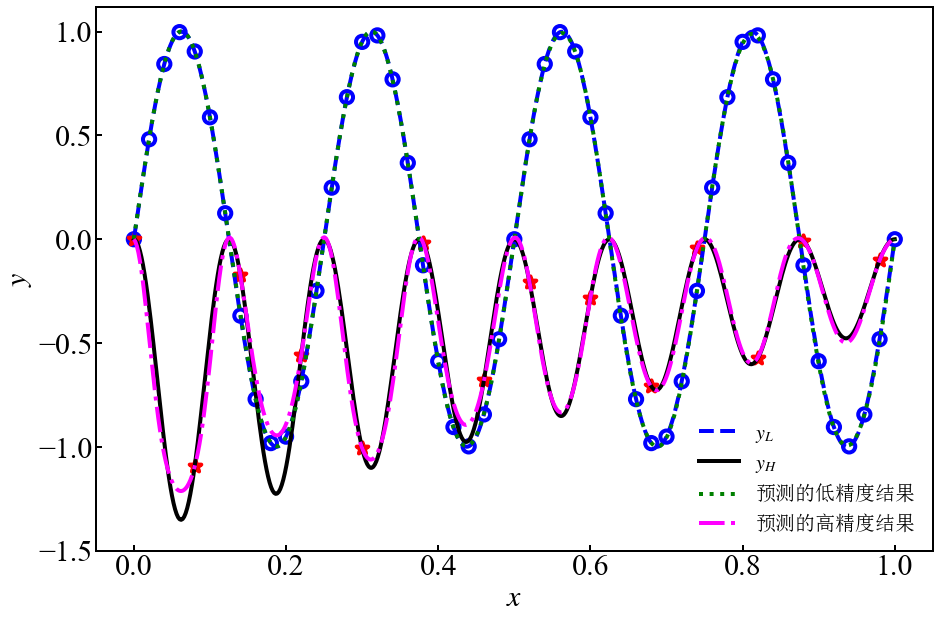

In [16]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)

xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)

model.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low, y_pred_high = model(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
plt.plot(a,y_pred_low.detach().cpu().numpy(),color='g',linestyle=':',linewidth=4)
plt.plot(a,y_pred_high.detach().cpu().numpy(),color='fuchsia',linestyle='-.',linewidth=4)
plt.legend([r"$y_L$",r"$y_H$","预测的低精度结果","预测的高精度结果"],frameon=False)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1],font="Times New Roman", fontsize = 30)
plt.yticks([-1.5,-1,-0.5,0,0.5,1],font="Times New Roman", fontsize = 30)
plt.xlabel(r"$x$",fontdict=font1)
plt.ylabel(r"$y$",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-2-2.png",dpi=600,bbox_inches = 'tight')
plt.show()

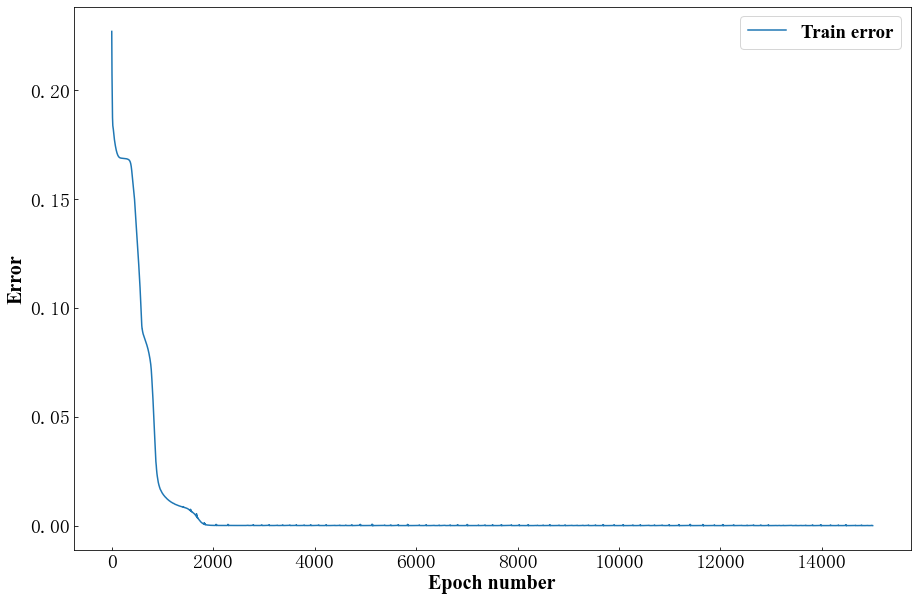

In [17]:
Epoch = list(range(1,len(Train_loss)+1))
fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(Epoch,Train_loss)
plt.legend(["Train error",],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("Epoch number",fontdict=font1)
plt.ylabel("Error",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

# 加法标度

In [18]:
xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)
high_idx = [0,4,7,11,15,19,23,26,30,34,37,41,44,49]

x_train_low = xL
y_train_low = yL
x_train_diff = xH
y_train_diff = yH - yL[high_idx]

print(yL)
print(yH)
print(x_train_low)
print(y_train_low)
print(x_train_diff)
print(y_train_diff)

[[ 0.00000000e+00]
 [ 4.81753674e-01]
 [ 8.44327926e-01]
 [ 9.98026728e-01]
 [ 9.04827052e-01]
 [ 5.87785252e-01]
 [ 1.25333234e-01]
 [-3.68124553e-01]
 [-7.70513243e-01]
 [-9.82287251e-01]
 [-9.51056516e-01]
 [-6.84547106e-01]
 [-2.48689887e-01]
 [ 2.48689887e-01]
 [ 6.84547106e-01]
 [ 9.51056516e-01]
 [ 9.82287251e-01]
 [ 7.70513243e-01]
 [ 3.68124553e-01]
 [-1.25333234e-01]
 [-5.87785252e-01]
 [-9.04827052e-01]
 [-9.98026728e-01]
 [-8.44327926e-01]
 [-4.81753674e-01]
 [-4.89858720e-16]
 [ 4.81753674e-01]
 [ 8.44327926e-01]
 [ 9.98026728e-01]
 [ 9.04827052e-01]
 [ 5.87785252e-01]
 [ 1.25333234e-01]
 [-3.68124553e-01]
 [-7.70513243e-01]
 [-9.82287251e-01]
 [-9.51056516e-01]
 [-6.84547106e-01]
 [-2.48689887e-01]
 [ 2.48689887e-01]
 [ 6.84547106e-01]
 [ 9.51056516e-01]
 [ 9.82287251e-01]
 [ 7.70513243e-01]
 [ 3.68124553e-01]
 [-1.25333234e-01]
 [-5.87785252e-01]
 [-9.04827052e-01]
 [-9.98026728e-01]
 [-8.44327926e-01]
 [-4.81753674e-01]
 [-9.79717439e-16]]
[[-0.        ]
 [-1.09233665]


In [19]:
x_train_low = torch.from_numpy(x_train_low).float()
y_train_low = torch.from_numpy(y_train_low).float()

x_train_diff = torch.from_numpy(x_train_diff).float()
y_train_diff = torch.from_numpy(y_train_diff).float()

low_train_data = torch.utils.data.TensorDataset(x_train_low, y_train_low)
diff_train_data = torch.utils.data.TensorDataset(x_train_diff, y_train_diff)

low_train_loader = torch.utils.data.DataLoader(low_train_data, batch_size=len(x_train_low), shuffle=True)  
diff_train_loader = torch.utils.data.DataLoader(diff_train_data, batch_size=len(x_train_diff), shuffle=True)  

In [20]:
class ADDModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(ADDModel, self).__init__()
        self.fully = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x = self.fully(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [21]:
low_model = ADDModel(init_weights=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
low_model.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()
optimizer = torch.optim.Adam(low_model.parameters(),lr=0.001)

ADDModel(
  (fully): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): Tanh()
  (6): Linear(in_features=20, out_features=20, bias=True)
  (7): Tanh()
  (8): Linear(in_features=20, out_features=1, bias=True)
)
Linear(in_features=1, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_

In [22]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_LowMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    low_model.train()

    for Data in low_train_loader:
        X, y_low = Data
        X, y_low = X.to(device), y_low.to(device)
        y_pred_low = low_model(X)
        loss = loss_f(y_pred_low, y_low)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(low_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()

print("Total time: ", time.time() - time0)

Total time:  32.78571319580078


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


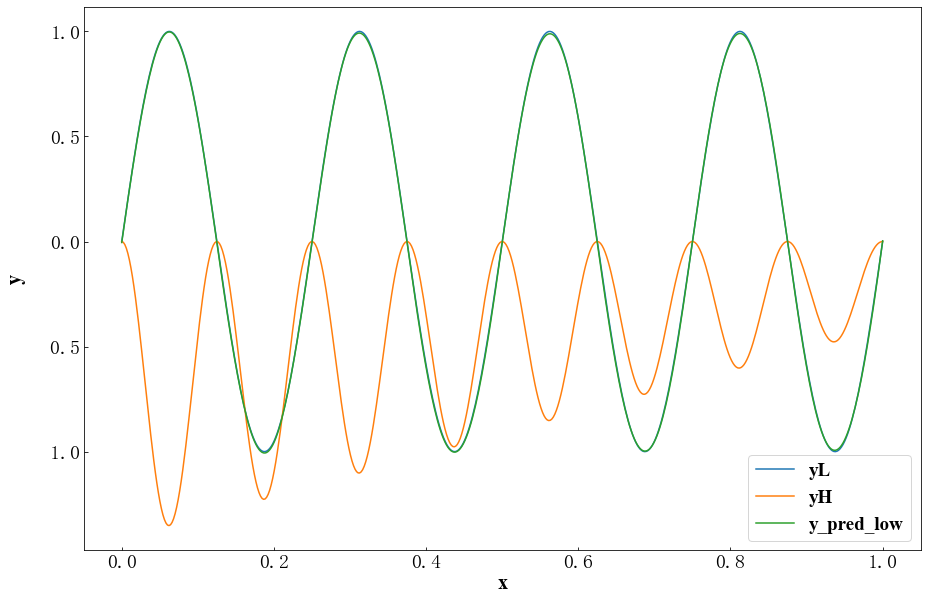

In [23]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)
low_model.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low = low_model(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_low.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

In [24]:
diff_model = ADDModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
diff_model.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()

cuda:0


In [25]:
optimizer = torch.optim.Adam(diff_model.parameters(),lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=50,gamma=0.9,last_epoch=-1)

In [26]:
epoch_n = 15000
diff_Train_loss = []
diff_Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_DiffMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    diff_model.train()

    for Data in diff_train_loader:
        X, y_diff = Data
        X, y_diff = X.to(device), y_diff.to(device)
        y_pred_diff = diff_model(X)
        loss = loss_f(y_pred_diff, y_diff)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(diff_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    diff_Train_time.append(time2-time1)
    diff_Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()
    
print("Total time: ", time.time() - time0)

Total time:  30.146734714508057


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


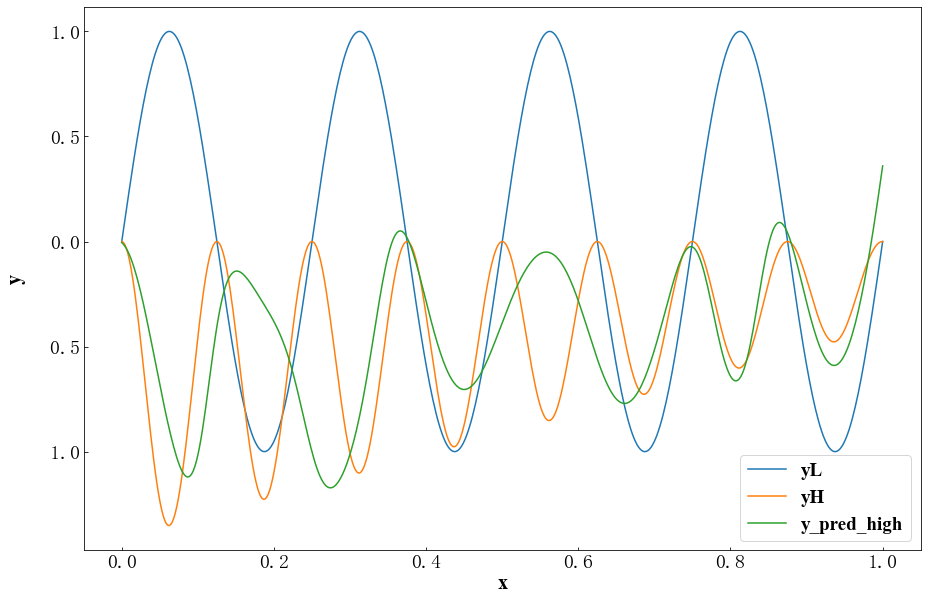

In [27]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)
low_model.eval()
diff_model.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_high = low_model(x_test) + diff_model(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_high.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_high"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

# 迁移学习

In [28]:
xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)
high_idx = [0,4,7,11,15,19,23,26,30,34,37,41,44,49]

x_train_low = xL
y_train_low = yL
x_train_high = xH
y_train_high = yH

print(yL)
print(yH)

[[ 0.00000000e+00]
 [ 4.81753674e-01]
 [ 8.44327926e-01]
 [ 9.98026728e-01]
 [ 9.04827052e-01]
 [ 5.87785252e-01]
 [ 1.25333234e-01]
 [-3.68124553e-01]
 [-7.70513243e-01]
 [-9.82287251e-01]
 [-9.51056516e-01]
 [-6.84547106e-01]
 [-2.48689887e-01]
 [ 2.48689887e-01]
 [ 6.84547106e-01]
 [ 9.51056516e-01]
 [ 9.82287251e-01]
 [ 7.70513243e-01]
 [ 3.68124553e-01]
 [-1.25333234e-01]
 [-5.87785252e-01]
 [-9.04827052e-01]
 [-9.98026728e-01]
 [-8.44327926e-01]
 [-4.81753674e-01]
 [-4.89858720e-16]
 [ 4.81753674e-01]
 [ 8.44327926e-01]
 [ 9.98026728e-01]
 [ 9.04827052e-01]
 [ 5.87785252e-01]
 [ 1.25333234e-01]
 [-3.68124553e-01]
 [-7.70513243e-01]
 [-9.82287251e-01]
 [-9.51056516e-01]
 [-6.84547106e-01]
 [-2.48689887e-01]
 [ 2.48689887e-01]
 [ 6.84547106e-01]
 [ 9.51056516e-01]
 [ 9.82287251e-01]
 [ 7.70513243e-01]
 [ 3.68124553e-01]
 [-1.25333234e-01]
 [-5.87785252e-01]
 [-9.04827052e-01]
 [-9.98026728e-01]
 [-8.44327926e-01]
 [-4.81753674e-01]
 [-9.79717439e-16]]
[[-0.        ]
 [-1.09233665]


In [29]:
x_train_low = torch.from_numpy(x_train_low).float()
y_train_low = torch.from_numpy(y_train_low).float()

x_train_high = torch.from_numpy(x_train_high).float()
y_train_high = torch.from_numpy(y_train_high).float()

low_train_data = torch.utils.data.TensorDataset(x_train_low, y_train_low)
high_train_data = torch.utils.data.TensorDataset(x_train_high, y_train_high)

low_train_loader = torch.utils.data.DataLoader(low_train_data, batch_size=len(x_train_low), shuffle=True,drop_last=True)  
high_train_loader = torch.utils.data.DataLoader(high_train_data, batch_size=len(x_train_high), shuffle=True, drop_last=True)  

In [30]:
class TRModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(TRModel, self).__init__()
        self.fully = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x = self.fully(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [31]:
TRmodel = TRModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
TRmodel.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()
optimizer = torch.optim.Adam(TRmodel.parameters(),lr=0.001)

cuda:0


In [32]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_LowMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    TRmodel.train()

    for Data in low_train_loader:
        X, y_low = Data
        X, y_low = X.to(device), y_low.to(device)
        y_pred_low = TRmodel(X)
        loss = loss_f(y_pred_low, y_low)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(low_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()
    
print("Total time: ", time.time() - time0)

Total time:  32.9431357383728


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


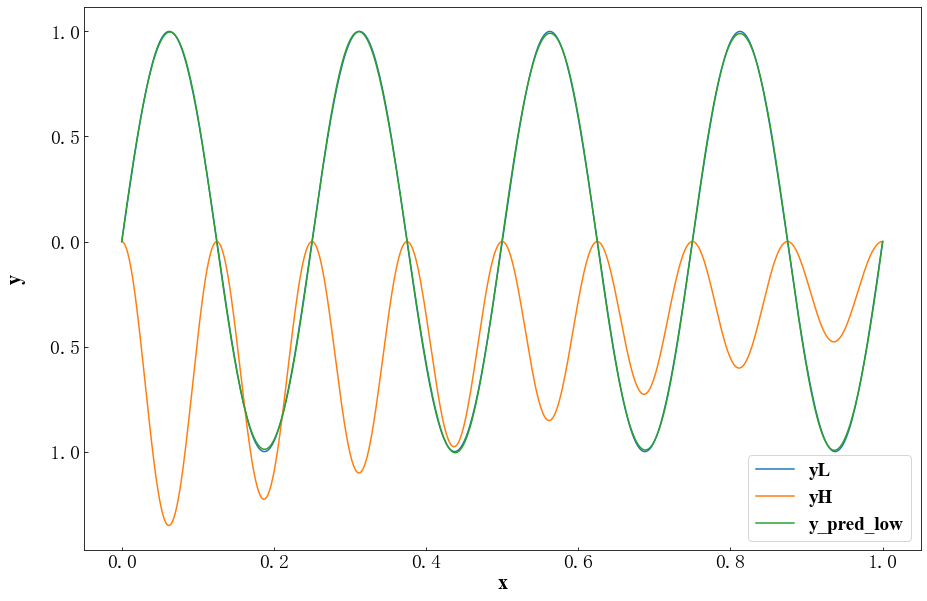

In [33]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)
TRmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low = TRmodel(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_low.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

In [34]:
optimizer = torch.optim.Adam(TRmodel.parameters(),lr=0.0001)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10)

In [35]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_TRMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    TRmodel.train()

    for Data in high_train_loader:
        X, y_high = Data
        X, y_high = X.to(device), y_high.to(device)
        y_pred_high = TRmodel(X)
        loss = loss_f(y_pred_high, y_high)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(high_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()

print("Total time: ", time.time() - time0)

Total time:  29.88862895965576


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


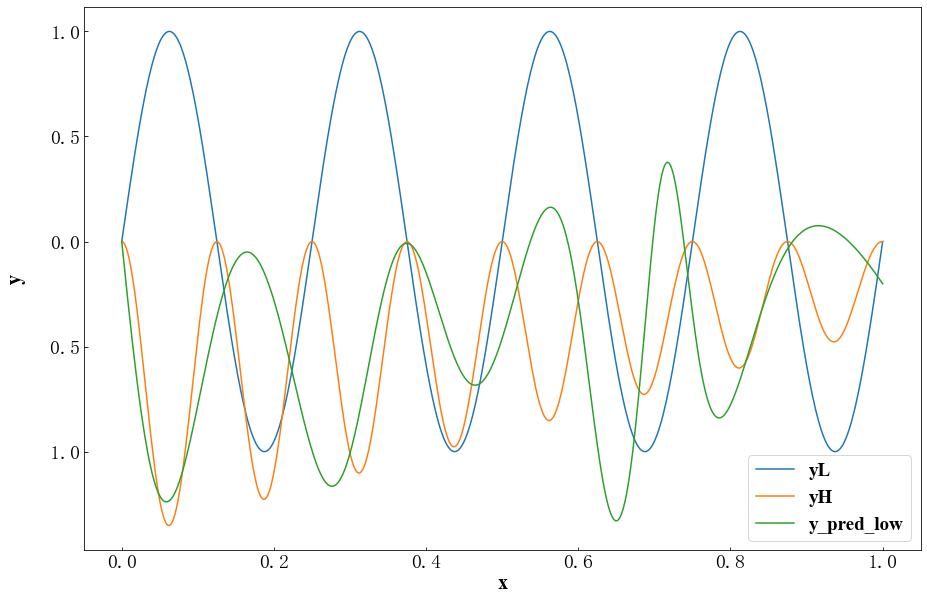

In [36]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)
TRmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low = TRmodel(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_low.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

# only high fidelity

In [37]:
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)

x_train = xH
y_train_high = yH

print(x_train)
print(y_train_high)

[[0.  ]
 [0.08]
 [0.14]
 [0.22]
 [0.3 ]
 [0.38]
 [0.46]
 [0.52]
 [0.6 ]
 [0.68]
 [0.74]
 [0.82]
 [0.88]
 [0.98]]
[[-0.        ]
 [-1.09233665]
 [-0.17267593]
 [-0.55961414]
 [-1.00781563]
 [-0.01624586]
 [-0.68024897]
 [-0.20753499]
 [-0.28130387]
 [-0.70843403]
 [-0.04169786]
 [-0.57334968]
 [-0.00839165]
 [-0.10077515]]


In [38]:
x_train = torch.from_numpy(x_train).float()
y_train_high = torch.from_numpy(y_train_high).float()

train_data = torch.utils.data.TensorDataset(x_train, y_train_high)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=len(x_train), shuffle=True, drop_last=True)  

In [39]:
class HModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(HModel, self).__init__()
        self.fully = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x = self.fully(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [40]:
Hmodel = HModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
Hmodel.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()
optimizer = torch.optim.Adam(Hmodel.parameters(),lr=0.001)

cuda:0


In [41]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,"finish_HMLP.pth")
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    Hmodel.train()

    for Data in train_loader:
        X, y_high = Data
        X, y_high = X.to(device), y_high.to(device)
        y_pred_high = Hmodel(X)
        loss = loss_f(y_pred_high, y_high)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0] 
    train_loss = running_loss/len(train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()
   
print("Total time: ", time.time() - time0)

Total time:  30.403197526931763


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


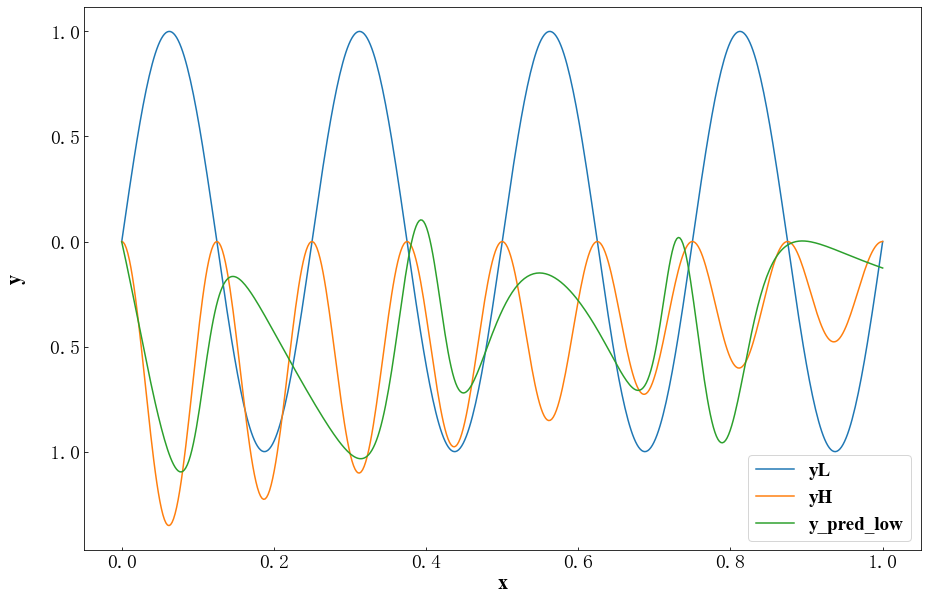

In [42]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)
Hmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_high = Hmodel(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_high.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

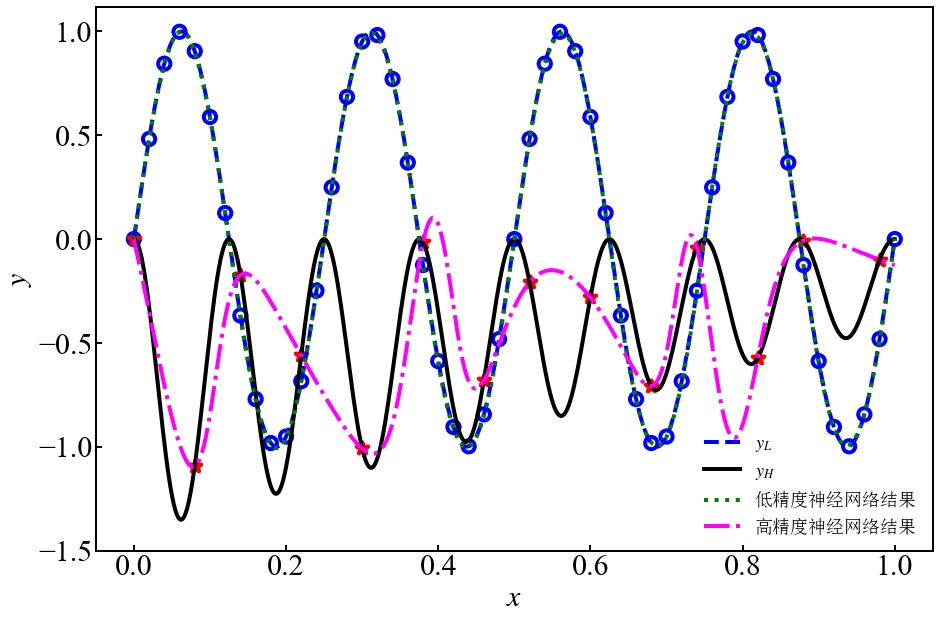

In [47]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)

xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)

low_model.eval()
Hmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred1 = low_model(x_test)
y_pred2 = Hmodel(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
plt.plot(a,y_pred1.detach().cpu().numpy(),color='g',linestyle=':',linewidth=4)
plt.plot(a,y_pred2.detach().cpu().numpy(),color='fuchsia',linestyle='-.',linewidth=4)
plt.legend([r"$y_L$",r"$y_H$","低精度神经网络结果","高精度神经网络结果"],frameon=False)
plt.xticks([0,0.2,0.4,0.6,0.8,1],font='Times New Roman',fontsize=30)
plt.yticks([-1.5,-1,-0.5,0,0.5,1],font='Times New Roman',fontsize=30)
plt.xlabel(r"$x$",fontdict=font1)
plt.ylabel(r"$y$",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-2-3.png",dpi=600,bbox_inches = 'tight')
plt.show()

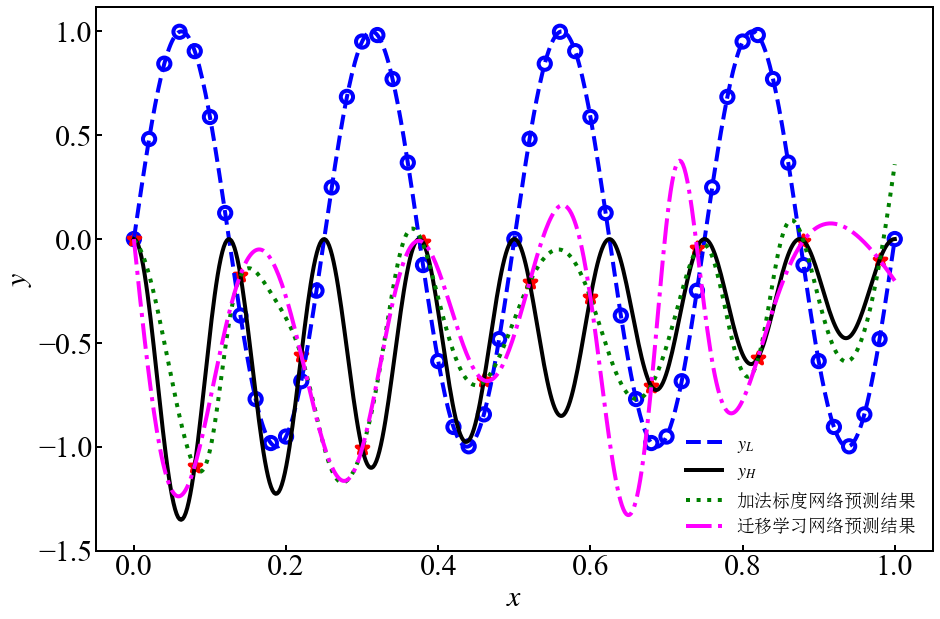

In [51]:
a = np.linspace(0,1,500).reshape((-1,1))
b = funcL(a)
c = funcH(a)

xL = np.linspace(0,1,51).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.08, 0.14, 0.22, 0.30, 0.38, 0.46, 0.52, 0.60, 0.68, 0.74, 0.82, 0.88, 0.98]).reshape((-1,1))
yH = funcH(xH)

low_model.eval()
diff_model.eval()
TRmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred3 = low_model(x_test) + diff_model(x_test)
y_pred4 = TRmodel(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
plt.plot(a,y_pred3.detach().cpu().numpy(),color='g',linestyle=':',linewidth=4)
plt.plot(a,y_pred4.detach().cpu().numpy(),color='fuchsia',linestyle='-.',linewidth=4)
plt.legend([r"$y_L$",r"$y_H$","加法标度网络预测结果","迁移学习网络预测结果"],frameon=False)
plt.xticks([0,0.2,0.4,0.6,0.8,1],font='Times New Roman',fontsize=30)
plt.yticks([-1.5,-1,-0.5,0,0.5,1],font='Times New Roman',fontsize=30)
plt.xlabel(r"$x$",fontdict=font1)
plt.ylabel(r"$y$",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-2-4.png",dpi=600,bbox_inches = 'tight')
plt.show()